### Load libraries and data

In [1]:
import pandas as pd
import numpy as np

path = './Twitter_data/twitter_full.csv'

df = pd.read_csv(path)
df.head()

,file_name,#followers,user_engagement,verified,depth,user_id1,tweet_id1,t1,user_id2,t2,veracity,resp_time,retw_prob,length,#hashs,#mentions,#URLs,sentiment_score,text,label
0,489800427152879616,15375121,72.567469,1,0.0,ROOT,489800427152879616,0.0,2467791,0.0,0,0.0,0.000031,95,0,0,2,-0.3182,malaysia airlines says it lost contact with pl...,1
1,560474897013415936,3673898,55.294333,1,0.0,ROOT,560474897013415936,0.0,59553554,0.0,0,0.0,0.000032,118,0,1,1,0.8398,for just $1 you can get a free jr. frosty with...,1
2,524928119955013632,1274260,32.033388,1,0.0,ROOT,524928119955013632,0.0,19038934,0.0,1,0.0,0.000184,133,1,0,0,-0.7269,police say they have located car belonging to ...,0
3,518830518792892416,13955752,64.548896,1,0.0,ROOT,518830518792892416,0.0,51241574,0.0,0,0.0,0.000007,96,0,0,1,-0.3400,mexico security forces hunting 43 missing stud...,1
4,551117430345711616,189683,24.726166,1,0.0,ROOT,551117430345711616,0.0,2280470022,0.0,0,0.0,0.000617,96,0,0,2,0.0000,news saudi arabia's national airline planning ...,1


### Lengths of tweets

In [2]:
tweet_ls = [tweet for tweet in df.text]

max_len = 0
tweet_len = []
for tweet in tweet_ls:
    tweet_len.append(len(tweet))

print('Number of tweets:', len(tweet_ls))
print('Max length of tweet:', max(tweet_len))
print('Mean length of tweets:', np.mean(tweet_len))

Number of tweets: 741
Max length of tweet: 140
Mean length of tweets: 91.59784075573549


###  Data preperations

In [3]:
df = df[['text','label']]

In [4]:
from sklearn.utils import shuffle

# Shuffle
df = shuffle(df).reset_index(drop=True)

display(df)

,text,label
0,apec photo of the day. rt @marc_leibowitz: pho...,1
1,latest update: attacker shot dead in parliamen...,0
2,developing news: soldier shot at war memorial....,0
3,breaking: malaysian airlines passenger 'shot d...,1
4,cdc whistleblower exposes ebola vaccinations c...,1
...,...,...
736,hp confirms that it's splitting into two compa...,0
737,goliath encounter: puppy-sized spider surprise...,0
738,nbc: arrest records show #ferguson cops jailed...,1
739,new. leaked phone call between rebel leader & ...,1


### Split data intro train, validation and test set

In [5]:
train_val_df = df.sample(frac = 0.8)
test_df = df.drop(train_val_df.index)

train_df = train_val_df.sample(frac = 0.8)
val_df = train_val_df.drop(train_df.index)

# Reset Index
train_df = train_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

print('trainset size:', train_df.shape)
print('valset size:', val_df.shape)
print('testset size:', test_df.shape)

trainset size: (474, 2)
valset size: (119, 2)
testset size: (148, 2)


### Dataframe to csv

In [6]:
# train_df.to_csv('./train.tsv', sep='\t', index=False)
# val_df.to_csv('./val.tsv', sep='\t', index=False)
# test_df.to_csv('./test.tsv', sep='\t', index=False)

### Concatenate all dataframe

In [7]:
df = pd.concat([train_df, val_df, test_df])
df

,text,label
0,vladimir putin’s motorcade as seen from the ai...,1
1,high school student reportedly makes 72 millio...,1
2,banksy's response to the #charliehebdo attack ...,1
3,officials took away this halloween decoration ...,0
4,audio may have captured michael brown shooting...,0
...,...,...
143,canada parliament shooting: - active shooter -...,0
144,fbi probing alleged audio of michael brown sho...,0
145,madden nfl 15 not only predicted a patriots vi...,0
146,scene at ottawa war memorial. soldier on duty ...,0


### Data Cleaning

In [8]:
import nltk
# Downloading Stopwords
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jurriaanparie/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
# Obtaining Additional Stopwords From nltk
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [10]:
# Removing Stopwords And Remove Words With 2 Or Less Characters
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3 and token not in stop_words:
            result.append(token)
            
    return result

In [11]:
import gensim

# Applying The Function To The Dataframe
df['clean'] = df['text'].apply(preprocess)

### Total words in dataset

In [12]:
list_of_words = []
for i in df.clean:
    for j in i:
        list_of_words.append(j)

total_words = len(list(set(list_of_words)))
total_words

2046

### Tokenization

In [13]:
from nltk import word_tokenize

### Tokenize

In [14]:
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer

# Creating A Tokenizer To Tokenize The Words And Create Sequences Of Tokenized Words
tokenizer = Tokenizer(num_words = total_words)
tokenizer.fit_on_texts(train_df['text'])

train_sequences = tokenizer.texts_to_sequences(train_df['text'])
val_sequences = tokenizer.texts_to_sequences(val_df['text'])
test_sequences = tokenizer.texts_to_sequences(test_df['text'])

### Fine-tuning pre-trained BERT model

In [15]:
import torch
from transformers import BertTokenizer

In [16]:
PRETRAINED_MODEL_NAME = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(PRETRAINED_MODEL_NAME)

### Dataset as Class

In [17]:
from torch.utils.data import Dataset

class FakeNewsDataset(Dataset):
    def __init__(self, mode, tokenizer):
        assert mode in ['train', 'val', 'test']
        self.mode = mode
        self.df = pd.read_csv('./' + mode + '.tsv', sep='\t').fillna("")
        self.len = len(self.df)
        self.tokenizer = tokenizer  # BERT tokenizer
    
    def __getitem__(self, idx):
        if self.mode == 'test':
            statement, label = self.df.iloc[idx, :].values
            label_tensor = torch.tensor(label)
        else:
            statement, label = self.df.iloc[idx, :].values
            label_tensor = torch.tensor(label)
            
        word_pieces = ['[CLS]']
        statement = self.tokenizer.tokenize(statement)
        word_pieces += statement + ['[SEP]']
        len_st = len(word_pieces)
        
        ids = self.tokenizer.convert_tokens_to_ids(word_pieces)
        tokens_tensor = torch.tensor(ids)
        
        segments_tensor = torch.tensor([0] * len_st, dtype=torch.long)
        
        return (tokens_tensor, segments_tensor, label_tensor)
    
    def __len__(self):
        return self.len
    
    
# Initialize Datasets for Transformation
trainset = FakeNewsDataset('train', tokenizer=tokenizer)
valset = FakeNewsDataset('val', tokenizer=tokenizer)
testset = FakeNewsDataset('test', tokenizer=tokenizer)

print('trainset size:' ,trainset.__len__())
print('valset size:',valset.__len__())
print('testset size: ',testset.__len__())

trainset size: 474
valset size: 119
testset size:  148


### Sampling and observing tensors

In [18]:
sample_idx = 0

statement, label = trainset.df.iloc[sample_idx].values

tokens_tensor, segments_tensor, label_tensor = trainset[sample_idx]

tokens = tokenizer.convert_ids_to_tokens(tokens_tensor.tolist())
combined_text = " ".join(tokens)

print(f"""
original_statement: 
{statement}

tokens: 
{tokens}

label: {label}

--------------------

tokens_tensor: 
{tokens_tensor}

segments_tensor: 
{segments_tensor}

label_tensor: 
{label_tensor}

""")


original_statement: 
it ain't banksy! meet @lucilleclerc, artist behind the iconic #charliehebdo pencil tribute URL URL

tokens: 
['[CLS]', 'it', 'ain', "'", 't', 'banks', '##y', '!', 'meet', '@', 'lucille', '##cle', '##rc', ',', 'artist', 'behind', 'the', 'iconic', '#', 'charlie', '##he', '##b', '##do', 'pencil', 'tribute', 'ur', '##l', 'ur', '##l', '[SEP]']

label: 1

--------------------

tokens_tensor: 
tensor([  101,  2009,  7110,  1005,  1056,  5085,  2100,   999,  3113,  1030,
        28016, 14321, 11890,  1010,  3063,  2369,  1996, 14430,  1001,  4918,
         5369,  2497,  3527, 14745,  7050, 24471,  2140, 24471,  2140,   102])

segments_tensor: 
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0])

label_tensor: 
1




### Reforming dataset

In [19]:
from torch.utils.data import DataLoader
from torch.nn.utils.rnn import pad_sequence

def create_mini_batch(samples):
    tokens_tensors = [s[0] for s in samples]
    segments_tensors = [s[1] for s in samples]
    
    # 測試集有 labels
    if samples[0][2] is not None:
        label_ids = torch.stack([s[2] for s in samples])
    else:
        label_ids = None
    
    # Zero Padding
    tokens_tensors = pad_sequence(tokens_tensors, batch_first=True)
    segments_tensors = pad_sequence(segments_tensors, batch_first=True)
    
    masks_tensors = torch.zeros(tokens_tensors.shape, dtype=torch.long)
    masks_tensors = masks_tensors.masked_fill(tokens_tensors != 0, 1)
    
    return tokens_tensors, segments_tensors, masks_tensors, label_ids

BATCH_SIZE = 16
trainloader = DataLoader(trainset, batch_size=BATCH_SIZE, collate_fn=create_mini_batch)
valloader = DataLoader(valset, batch_size=BATCH_SIZE, collate_fn=create_mini_batch)
testloader = DataLoader(testset, batch_size=BATCH_SIZE,collate_fn=create_mini_batch)

In [20]:
data = next(iter(trainloader))

tokens_tensors, segments_tensors, masks_tensors, label_ids = data

print(f"""
tokens_tensors.shape   = {tokens_tensors.shape} 
{tokens_tensors}
------------------------
segments_tensors.shape = {segments_tensors.shape}
{segments_tensors}
------------------------
masks_tensors.shape    = {masks_tensors.shape}
{masks_tensors}
------------------------
label_ids.shape        = {label_ids.shape}
{label_ids}
""")


tokens_tensors.shape   = torch.Size([16, 35]) 
tensor([[  101,  2009,  7110,  1005,  1056,  5085,  2100,   999,  3113,  1030,
         28016, 14321, 11890,  1010,  3063,  2369,  1996, 14430,  1001,  4918,
          5369,  2497,  3527, 14745,  7050, 24471,  2140, 24471,  2140,   102,
             0,     0,     0,     0,     0],
        [  101,  1996,  2088,  2003,  2770,  2041,  1997,  7967,  1010,  2088,
          1521,  1055,  2922,  7967,  7751, 19428, 24471,  2140, 24471,  2140,
           102,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0],
        [  101, 15885,  1024,  4901, 18571,  5312,  2044,  5008,  2757,  3010,
          3323, 17346, 24471,  2140, 24471,  2140,   102,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0],
        [  101,  2703,  5232,  1005,  1055,  3435,  1998,  1996,  9943,  6849,
          2869,  1998,  206

### Model Construction

In [21]:
from transformers import BertForSequenceClassification
from IPython.display import display, clear_output

PRETRAINED_MODEL_NAME = "bert-base-uncased"
NUM_LABELS = 2

model = BertForSequenceClassification.from_pretrained(
    PRETRAINED_MODEL_NAME, num_labels=NUM_LABELS)

clear_output()

print("""
name             module
-----------------------""")
for name, module in model.named_children():
    if name == "bert":
        for n, _ in module.named_children():
            print(f"{name}:{n}")
    else:
        print("{:16} {}".format(name, module))


name             module
-----------------------
bert:embeddings
bert:encoder
bert:pooler
dropout          Dropout(p=0.1, inplace=False)
classifier       Linear(in_features=768, out_features=2, bias=True)


In [22]:
model.config

BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.20.1",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

### Fine-tuning BERT

In [23]:
# %%time
from sklearn.metrics import accuracy_score
from tqdm.notebook import tqdm

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("device:", device)
model = model.to(device)

model.train()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-5)
NUM_EPOCHS = 3

for epoch in range(NUM_EPOCHS):
    train_loss = 0.0
    train_acc = 0.0

    loop = tqdm(trainloader)
    for batch_idx, data in enumerate(loop):
        tokens_tensors, segments_tensors, masks_tensors, labels = [t.to(device) for t in data]

        optimizer.zero_grad()
        
        outputs = model(input_ids=tokens_tensors, 
                        token_type_ids=segments_tensors, 
                        attention_mask=masks_tensors, 
                        labels=labels)

        loss = outputs[0]
        loss.backward()
        optimizer.step()

        logits = outputs[1]
        _, pred = torch.max(logits.data, 1)
        train_acc = accuracy_score(pred.cpu().tolist() , labels.cpu().tolist())

        train_loss += loss.item()

        loop.set_description(f"Epoch [{epoch+1}/{NUM_EPOCHS}]")
        loop.set_postfix(acc = train_acc, loss = train_loss)

device: cpu


  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

In [24]:
torch.save(model, './best_model.pth')
print('Model saved!')

Model saved!


### Test data

[[0.7752809  0.11864407]
 [0.2247191  0.88135593]]
Acc:  0.8175675675675675


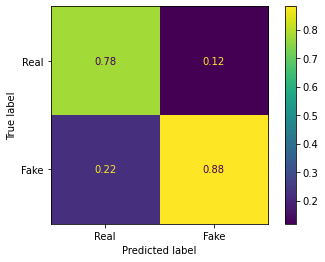

In [37]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

true=[]
predictions=[]
with torch.no_grad():
    model.eval()
    for data in testloader:
        if next(model.parameters()).is_cuda:
            data = [t.to(device) for t in data if t is not None]
            
        tokens_tensors, segments_tensors, masks_tensors = data[:3]
        test_outputs = model(input_ids=tokens_tensors, 
                    token_type_ids=segments_tensors, 
                    attention_mask=masks_tensors)

        logits = test_outputs[0]
        _, pred = torch.max(logits.data, 1)

        labels = data[3]
        true.extend(labels.cpu().tolist())
        predictions.extend(pred.cpu().tolist())


cm = confusion_matrix(true, predictions, labels=[1, 0], normalize='pred')
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Real', 'Fake'])
disp.plot()

print('Acc: ', accuracy_score(predictions,true))

In [55]:
df = pd.DataFrame({"pred_label": predictions})
df_true = pd.DataFrame({"label": true})

df_pred = pd.concat([test_df.loc[:, ['text']], 
                     df_true.loc[:, ['label']], 
                     df.loc[:, 'pred_label']], axis=1)
df_pred.head()

,text,label,pred_label
0,apec photo of the day. rt @marc_leibowitz: pho...,0,0
1,developing news: soldier shot at war memorial....,0,0
2,r.i.p to roger rodas who died alongside paul w...,0,0
3,"we are running out of chocolate, warns world's...",0,0
4,fact: florida state university shooter's last ...,0,1


In [56]:
df_pred.to_csv('./pred_bert_1.csv', index=False)